In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

random_seed = 0

#loading data
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
dataset = numpy.loadtxt(Path, delimiter=",", skiprows=1)

#shuffling data
numpy.random.seed(random_seed)
numpy.random.shuffle(dataset)

#loading inputs and outputs
X1 = dataset[:,5:6] #Leptin
X2 = dataset[:,6:7] #Adiponectin
X3 = dataset[:,0:1] #Age
X4 = dataset[:,7:8] #Resistin
X5 = dataset[:,2:3] #Glucose
Y = dataset[:,9:10] #Classification

#normalization_function
def normalization(x):
    return (x - min(x)) / (max(x) - min(x))

#normalization
X1 = normalization(X1)
X2 = normalization(X2)
X3 = normalization(X3)
X4 = normalization(X4)
X5 = normalization(X5)

#load training data (Y)
Y = Y - 1

Using TensorFlow backend.


In [2]:
#setting a random seed
numpy.random.seed(random_seed)

#constructing input layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
input_layer_X3 = keras.layers.Input(shape=(1, ), name='input_layer_X3')
input_layer_X4 = keras.layers.Input(shape=(1, ), name='input_layer_X4')
input_layer_X5 = keras.layers.Input(shape=(1, ), name='input_layer_X5')

#constructing hidden layers
merge_layer = keras.layers.concatenate([input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(9, activation = 'linear', name='hidden_layer_1')(merge_layer)
hidden_layer_2 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#constructing output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#constructing the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5], outputs=output_layer)
model.summary()

#setting loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc', keras.metrics.AUC()])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X3 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X4 (InputLayer)     (None, 1)            0                                            
____________________________________________________________________________________________

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2, X3, X4, X5], Y, validation_split=0.2, epochs = 700, batch_size = 1)

Train on 92 samples, validate on 24 samples
Epoch 1/700
92/92 [==============================] - 1s 8ms/step - loss: 0.6866 - acc: 0.5652 - auc_1: 0.5826 - val_loss: 0.6405 - val_acc: 0.7083 - val_auc_1: 0.7571
Epoch 2/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6653 - acc: 0.6522 - auc_1: 0.6845 - val_loss: 0.6137 - val_acc: 0.8333 - val_auc_1: 0.7536
Epoch 3/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6517 - acc: 0.6304 - auc_1: 0.6924 - val_loss: 0.5946 - val_acc: 0.7917 - val_auc_1: 0.7429
Epoch 4/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6327 - acc: 0.6304 - auc_1: 0.7169 - val_loss: 0.5774 - val_acc: 0.7083 - val_auc_1: 0.7536
Epoch 5/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6139 - acc: 0.6630 - auc_1: 0.7310 - val_loss: 0.5528 - val_acc: 0.7917 - val_auc_1: 0.7964
Epoch 6/700
92/92 [==============================] - 0s 3ms/step - loss: 0.6072 - acc: 0.6413 - auc_1: 0.7410 - val_loss:

92/92 [==============================] - ETA: 0s - loss: 0.4813 - acc: 0.7763 - auc_1: 0.8481 - 0s 3ms/step - loss: 0.4281 - acc: 0.8152 - auc_1: 0.8843 - val_loss: 0.5268 - val_acc: 0.6667 - val_auc_1: 0.8893
Epoch 50/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4088 - acc: 0.7935 - auc_1: 0.8971 - val_loss: 0.4397 - val_acc: 0.8750 - val_auc_1: 0.8929
Epoch 51/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4395 - acc: 0.7826 - auc_1: 0.8736 - val_loss: 0.4884 - val_acc: 0.7500 - val_auc_1: 0.8929
Epoch 52/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4326 - acc: 0.7826 - auc_1: 0.8752 - val_loss: 0.4855 - val_acc: 0.6667 - val_auc_1: 0.8929
Epoch 53/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4260 - acc: 0.8043 - auc_1: 0.8807 - val_loss: 0.4740 - val_acc: 0.7083 - val_auc_1: 0.9071
Epoch 54/700
92/92 [==============================] - 0s 3ms/step - loss: 0.4289 - acc: 0.8043 - auc_1: 0.8790 - val_l

92/92 [==============================] - 0s 3ms/step - loss: 0.3862 - acc: 0.8261 - auc_1: 0.8988 - val_loss: 0.5878 - val_acc: 0.7083 - val_auc_1: 0.8536
Epoch 98/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3936 - acc: 0.7935 - auc_1: 0.8940 - val_loss: 0.6006 - val_acc: 0.6667 - val_auc_1: 0.8536
Epoch 99/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3964 - acc: 0.8370 - auc_1: 0.8933 - val_loss: 0.6376 - val_acc: 0.6667 - val_auc_1: 0.8679
Epoch 100/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3874 - acc: 0.8152 - auc_1: 0.9017 - val_loss: 0.6306 - val_acc: 0.6667 - val_auc_1: 0.8607
Epoch 101/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3973 - acc: 0.8043 - auc_1: 0.8945 - val_loss: 0.6483 - val_acc: 0.6667 - val_auc_1: 0.8607
Epoch 102/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3943 - acc: 0.8261 - auc_1: 0.8940 - val_loss: 0.6853 - val_acc: 0.6667 - val_auc_1: 0.8643
Ep

92/92 [==============================] - 0s 3ms/step - loss: 0.3604 - acc: 0.8261 - auc_1: 0.9126 - val_loss: 0.7904 - val_acc: 0.5833 - val_auc_1: 0.8500
Epoch 146/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3552 - acc: 0.8261 - auc_1: 0.9193 - val_loss: 0.6963 - val_acc: 0.6667 - val_auc_1: 0.8464
Epoch 147/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3449 - acc: 0.8478 - auc_1: 0.9250 - val_loss: 0.7459 - val_acc: 0.6250 - val_auc_1: 0.8643
Epoch 148/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3565 - acc: 0.8370 - auc_1: 0.9179 - val_loss: 0.7399 - val_acc: 0.6250 - val_auc_1: 0.8571
Epoch 149/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3515 - acc: 0.8043 - auc_1: 0.9212 - val_loss: 0.7161 - val_acc: 0.6250 - val_auc_1: 0.8464
Epoch 150/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3501 - acc: 0.8261 - auc_1: 0.9171 - val_loss: 0.7110 - val_acc: 0.7083 - val_auc_1: 0.8143


92/92 [==============================] - 0s 3ms/step - loss: 0.2963 - acc: 0.8478 - auc_1: 0.9421 - val_loss: 0.7287 - val_acc: 0.6667 - val_auc_1: 0.8714
Epoch 194/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2953 - acc: 0.8587 - auc_1: 0.9436 - val_loss: 0.7576 - val_acc: 0.6250 - val_auc_1: 0.8643
Epoch 195/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3046 - acc: 0.8261 - auc_1: 0.9407 - val_loss: 0.7179 - val_acc: 0.6667 - val_auc_1: 0.8679
Epoch 196/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2892 - acc: 0.8478 - auc_1: 0.9476 - val_loss: 0.7443 - val_acc: 0.7083 - val_auc_1: 0.8536
Epoch 197/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3125 - acc: 0.8587 - auc_1: 0.9381 - val_loss: 0.6841 - val_acc: 0.7500 - val_auc_1: 0.8714
Epoch 198/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2873 - acc: 0.8587 - auc_1: 0.9460 - val_loss: 0.7536 - val_acc: 0.6667 - val_auc_1: 0.8643


92/92 [==============================] - 0s 3ms/step - loss: 0.2317 - acc: 0.8804 - auc_1: 0.9700 - val_loss: 0.7769 - val_acc: 0.6667 - val_auc_1: 0.8714
Epoch 242/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2358 - acc: 0.8587 - auc_1: 0.9657 - val_loss: 0.8267 - val_acc: 0.6250 - val_auc_1: 0.8214
Epoch 243/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2251 - acc: 0.8804 - auc_1: 0.9710 - val_loss: 0.7797 - val_acc: 0.6667 - val_auc_1: 0.8321
Epoch 244/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2271 - acc: 0.9022 - auc_1: 0.9714 - val_loss: 0.8289 - val_acc: 0.5833 - val_auc_1: 0.8036
Epoch 245/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2130 - acc: 0.8913 - auc_1: 0.9750 - val_loss: 0.8088 - val_acc: 0.5417 - val_auc_1: 0.7714
Epoch 246/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2277 - acc: 0.8913 - auc_1: 0.9679 - val_loss: 0.8248 - val_acc: 0.5833 - val_auc_1: 0.8107


92/92 [==============================] - 0s 3ms/step - loss: 0.1674 - acc: 0.9348 - auc_1: 0.9881 - val_loss: 0.8358 - val_acc: 0.7083 - val_auc_1: 0.8286
Epoch 290/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1389 - acc: 0.9348 - auc_1: 0.9926 - val_loss: 1.0175 - val_acc: 0.6250 - val_auc_1: 0.8107
Epoch 291/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1675 - acc: 0.9348 - auc_1: 0.9931 - val_loss: 0.7461 - val_acc: 0.7917 - val_auc_1: 0.8429
Epoch 292/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1434 - acc: 0.9457 - auc_1: 0.9919 - val_loss: 0.7883 - val_acc: 0.7500 - val_auc_1: 0.8357
Epoch 293/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1375 - acc: 0.9674 - auc_1: 0.9952 - val_loss: 0.8552 - val_acc: 0.7083 - val_auc_1: 0.8214
Epoch 294/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1350 - acc: 0.9565 - auc_1: 0.9967 - val_loss: 0.7913 - val_acc: 0.7500 - val_auc_1: 0.8286


92/92 [==============================] - 0s 3ms/step - loss: 0.0938 - acc: 0.9674 - auc_1: 0.9967 - val_loss: 1.0664 - val_acc: 0.7083 - val_auc_1: 0.7821
Epoch 338/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0819 - acc: 0.9674 - auc_1: 0.9981 - val_loss: 1.1523 - val_acc: 0.7083 - val_auc_1: 0.7750
Epoch 339/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0860 - acc: 0.9783 - auc_1: 0.9986 - val_loss: 0.8465 - val_acc: 0.7083 - val_auc_1: 0.7964
Epoch 340/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0867 - acc: 0.9674 - auc_1: 0.9986 - val_loss: 0.8547 - val_acc: 0.7083 - val_auc_1: 0.8250
Epoch 341/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0772 - acc: 0.9783 - auc_1: 0.9995 - val_loss: 1.0181 - val_acc: 0.6667 - val_auc_1: 0.7750
Epoch 342/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1139 - acc: 0.9565 - auc_1: 0.9929 - val_loss: 0.8500 - val_acc: 0.7083 - val_auc_1: 0.8036


92/92 [==============================] - 0s 3ms/step - loss: 0.0541 - acc: 0.9891 - auc_1: 0.9990 - val_loss: 1.0814 - val_acc: 0.6667 - val_auc_1: 0.7857
Epoch 386/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0559 - acc: 0.9891 - auc_1: 0.9986 - val_loss: 1.2177 - val_acc: 0.7083 - val_auc_1: 0.7607
Epoch 387/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0551 - acc: 0.9891 - auc_1: 0.9998 - val_loss: 0.9623 - val_acc: 0.6667 - val_auc_1: 0.7929
Epoch 388/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0515 - acc: 0.9891 - auc_1: 0.9990 - val_loss: 1.3862 - val_acc: 0.7083 - val_auc_1: 0.7821
Epoch 389/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0635 - acc: 0.9783 - auc_1: 0.9995 - val_loss: 1.1069 - val_acc: 0.6250 - val_auc_1: 0.7857
Epoch 390/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0562 - acc: 0.9783 - auc_1: 0.9990 - val_loss: 1.2432 - val_acc: 0.6250 - val_auc_1: 0.7643


92/92 [==============================] - 0s 3ms/step - loss: 0.0350 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 0.9614 - val_acc: 0.7083 - val_auc_1: 0.8179
Epoch 434/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0644 - acc: 0.9783 - auc_1: 0.9981 - val_loss: 1.5763 - val_acc: 0.6667 - val_auc_1: 0.7286
Epoch 435/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0586 - acc: 0.9783 - auc_1: 0.9981 - val_loss: 1.1535 - val_acc: 0.6667 - val_auc_1: 0.8321
Epoch 436/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0465 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 1.3612 - val_acc: 0.6250 - val_auc_1: 0.8000
Epoch 437/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1869 - acc: 0.9348 - auc_1: 0.9817 - val_loss: 1.4663 - val_acc: 0.6250 - val_auc_1: 0.7786
Epoch 438/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1315 - acc: 0.9565 - auc_1: 0.9890 - val_loss: 1.3075 - val_acc: 0.6667 - val_auc_1: 0.8000


92/92 [==============================] - 0s 3ms/step - loss: 0.0417 - acc: 0.9783 - auc_1: 0.9995 - val_loss: 1.4395 - val_acc: 0.6667 - val_auc_1: 0.8036
Epoch 482/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0654 - acc: 0.9674 - auc_1: 0.9981 - val_loss: 1.4002 - val_acc: 0.6667 - val_auc_1: 0.7500
Epoch 483/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0685 - acc: 0.9674 - auc_1: 0.9974 - val_loss: 1.4465 - val_acc: 0.6667 - val_auc_1: 0.7821
Epoch 484/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0359 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 1.0940 - val_acc: 0.6667 - val_auc_1: 0.8429
Epoch 485/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0265 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1929 - val_acc: 0.7083 - val_auc_1: 0.8286
Epoch 486/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0304 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 0.9427 - val_acc: 0.6667 - val_auc_1: 0.8393


92/92 [==============================] - 0s 3ms/step - loss: 0.0608 - acc: 0.9783 - auc_1: 0.9976 - val_loss: 1.0411 - val_acc: 0.7500 - val_auc_1: 0.8143
Epoch 530/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0338 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2242 - val_acc: 0.7083 - val_auc_1: 0.8107
Epoch 531/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1487 - acc: 0.9348 - auc_1: 0.9902 - val_loss: 1.3159 - val_acc: 0.7083 - val_auc_1: 0.8143
Epoch 532/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0325 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 1.0776 - val_acc: 0.6667 - val_auc_1: 0.8857
Epoch 533/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0158 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.0540 - val_acc: 0.6667 - val_auc_1: 0.8750
Epoch 534/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0130 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1058 - val_acc: 0.6667 - val_auc_1: 0.8786


92/92 [==============================] - 0s 3ms/step - loss: 0.0124 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.0954 - val_acc: 0.7500 - val_auc_1: 0.8536
Epoch 578/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0091 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1360 - val_acc: 0.7500 - val_auc_1: 0.8536
Epoch 579/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0084 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1211 - val_acc: 0.7500 - val_auc_1: 0.8536
Epoch 580/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0080 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1387 - val_acc: 0.7500 - val_auc_1: 0.8536
Epoch 581/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0078 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1418 - val_acc: 0.7500 - val_auc_1: 0.8536
Epoch 582/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0074 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1918 - val_acc: 0.7500 - val_auc_1: 0.8500


92/92 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1371 - val_acc: 0.7500 - val_auc_1: 0.8500
Epoch 626/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0047 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1502 - val_acc: 0.7500 - val_auc_1: 0.8500
Epoch 627/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1500 - val_acc: 0.7500 - val_auc_1: 0.8500
Epoch 628/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0048 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1600 - val_acc: 0.7500 - val_auc_1: 0.8214
Epoch 629/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0046 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1254 - val_acc: 0.7500 - val_auc_1: 0.8500
Epoch 630/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0044 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1433 - val_acc: 0.7500 - val_auc_1: 0.8214


92/92 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2296 - val_acc: 0.7500 - val_auc_1: 0.8357
Epoch 674/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0028 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.1674 - val_acc: 0.7500 - val_auc_1: 0.8429
Epoch 675/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0030 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2485 - val_acc: 0.7500 - val_auc_1: 0.8429
Epoch 676/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2506 - val_acc: 0.7500 - val_auc_1: 0.8286
Epoch 677/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0030 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2735 - val_acc: 0.7500 - val_auc_1: 0.8286
Epoch 678/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0029 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2440 - val_acc: 0.7500 - val_auc_1: 0.8429


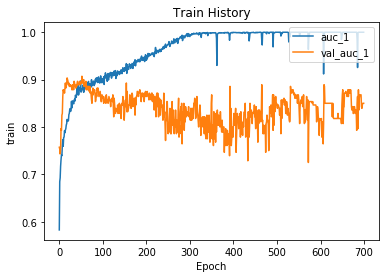

[array([[-4.0881070e-01,  1.7007966e+00,  6.9004856e-02, -1.1044264e+00,
         5.3930092e-01, -5.2818257e-01, -4.4793886e-01,  4.9431887e-01,
        -9.9468797e-01],
       [ 1.1250957e-01, -1.4004050e+00, -1.4178330e-01, -1.8224800e+00,
         9.7300464e-01,  3.0655795e-01,  1.7286868e+00, -2.1085439e+00,
        -1.4521889e-01],
       [ 4.3846667e-01, -5.0492465e-01,  1.1611291e+00,  7.9584777e-01,
        -4.4810659e-01, -8.1534982e-01,  7.0983464e-01, -1.7379528e-01,
        -2.7556652e-01],
       [ 7.1722168e-01,  1.4188364e-01, -3.1795690e+00,  7.4569964e-01,
        -1.6084092e+00,  3.4346044e+00,  3.0223820e-01, -7.8760052e-01,
         2.2450368e+00],
       [-1.8973413e+00,  1.5415464e-01, -6.0890192e-01, -4.2184412e-01,
        -1.3627585e+00,  3.8761836e-01,  6.1264312e-01, -1.2506975e-03,
         1.5441883e+00]], dtype=float32), array([-0.05279307,  0.37027958, -0.10518221,  0.16322547,  0.14424203,
       -0.02659655, -0.5111968 ,  0.36118874, -0.18979488], dtype

In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'auc_1', 'val_auc_1')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2, X3, X4, X5])
print(predictions)

[[1.9310389e-02]
 [9.8879927e-01]
 [9.9929738e-01]
 [2.7341483e-05]
 [5.0833408e-04]
 [9.9992204e-01]
 [9.9458164e-01]
 [9.9992752e-01]
 [9.7049361e-01]
 [9.9018490e-01]
 [4.7183137e-05]
 [1.3327988e-02]
 [9.9998534e-01]
 [4.4209571e-03]
 [1.2239459e-02]
 [9.9978012e-01]
 [3.3006806e-02]
 [9.9965048e-01]
 [9.9737263e-01]
 [9.9903035e-01]
 [1.1760853e-05]
 [4.8743761e-05]
 [2.4933170e-03]
 [9.9922955e-01]
 [9.9994707e-01]
 [9.9961507e-01]
 [9.9947602e-01]
 [9.9862468e-01]
 [1.9240353e-04]
 [9.9999106e-01]
 [1.0080112e-03]
 [1.4260758e-05]
 [7.8939142e-05]
 [4.4414087e-04]
 [2.7840126e-06]
 [9.9971229e-01]
 [9.9961448e-01]
 [9.9467802e-01]
 [9.9991906e-01]
 [9.9925739e-01]
 [9.9999070e-01]
 [9.9971896e-01]
 [1.3014390e-03]
 [3.3589935e-05]
 [2.0616364e-05]
 [9.8119628e-01]
 [9.9641740e-01]
 [9.9999750e-01]
 [9.9926835e-01]
 [4.6918666e-04]
 [1.7505980e-06]
 [9.9622452e-01]
 [3.4641320e-07]
 [1.5224512e-04]
 [3.2267606e-05]
 [9.3765408e-07]
 [6.5301764e-03]
 [9.9999249e-01]
 [9.5630949e-0